In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape

(200, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

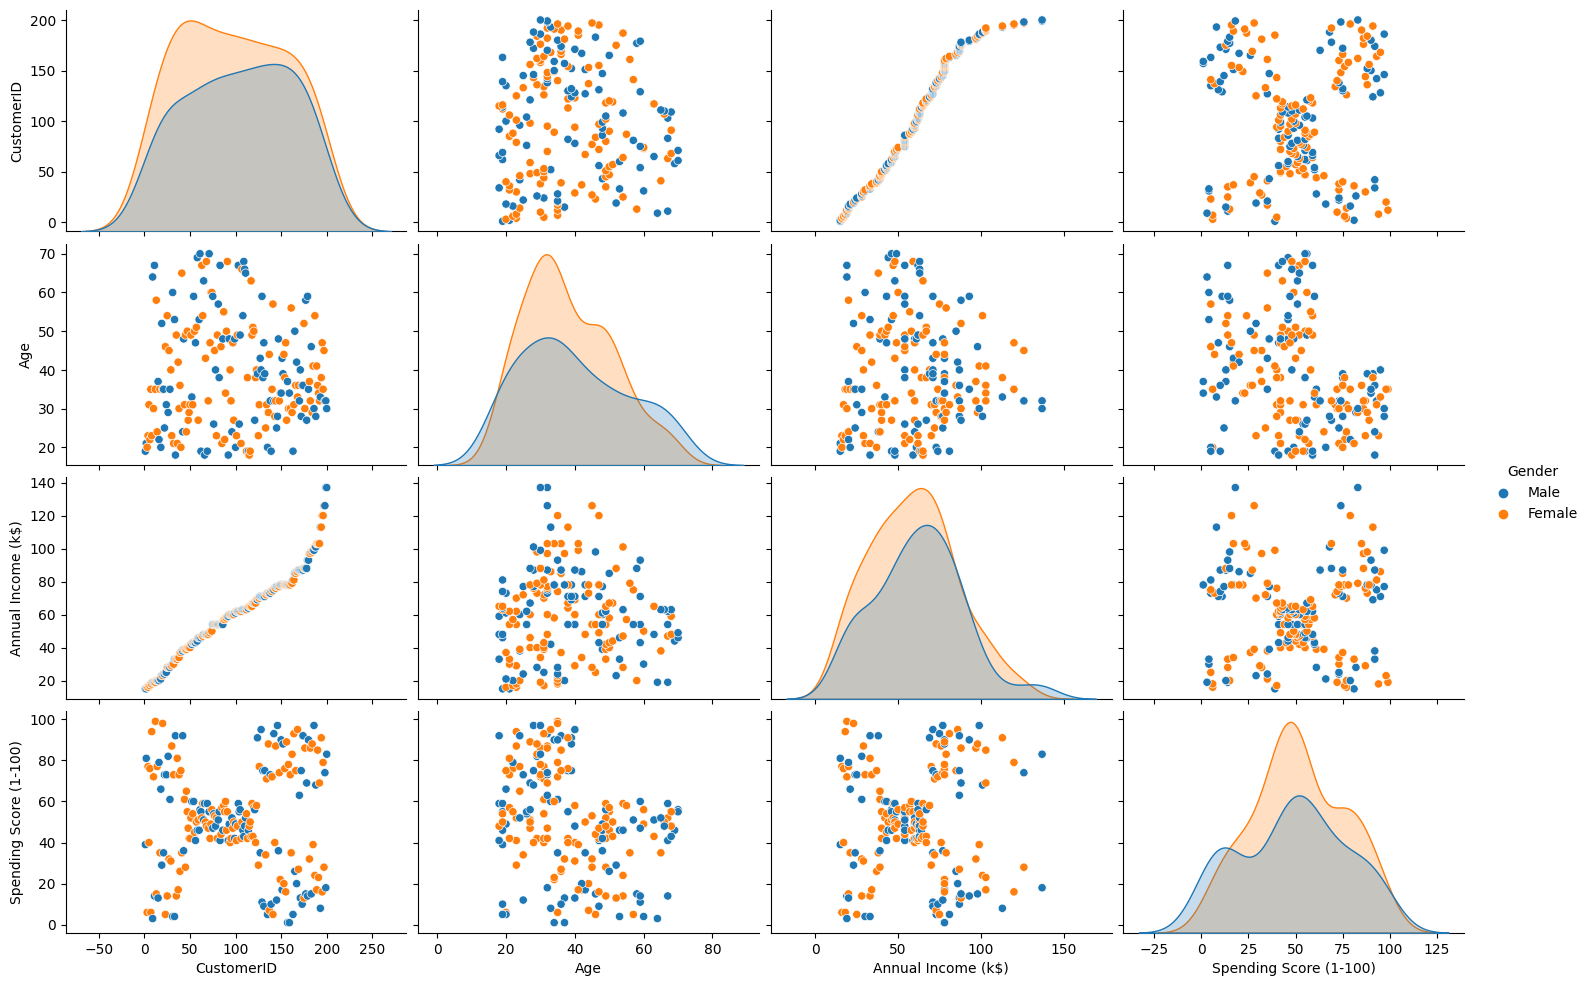

In [15]:
sns.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

yukarıdaki grafikten, cinsiyetin müşterileri segmentlere ayırmakla doğrudan bir ilişkisi olmadığını görüyoruz.

In [16]:
# yıllık gelir ile harcama skoru arasında bir ilişki kurmak istediğimiz için diğer sütunları çıkarıyoruz
df = df.drop(['CustomerID', 'Gender','Age'], axis=1)
df.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
# Bazı sütun isimleri çok uzun onları kısaltalım:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

In [18]:
# normalizasyon yapıyoruz

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])


df.head()

,income,score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [19]:
k_range = range(1,11)

wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(df[['income','score']])
    wcss.append(kmeans.inertia_)

C:\Users\fbmer\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


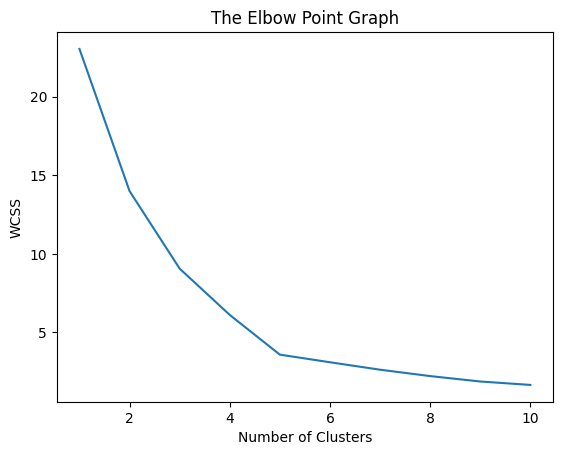

In [20]:
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Point Graph')
plt.plot(k_range,wcss)
plt.show()

## Optimum Number of Clusters = 5

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predicted = kmeans.fit_predict(df[['income','score']])
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [22]:
df['cluster'] = y_predicted
df.head(10)

,income,score,cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2
5,0.016393,0.765306,3
6,0.024590,0.051020,2
7,0.024590,0.948980,3
8,0.032787,0.020408,2
9,0.032787,0.724490,3


In [23]:
kmeans.cluster_centers_   

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

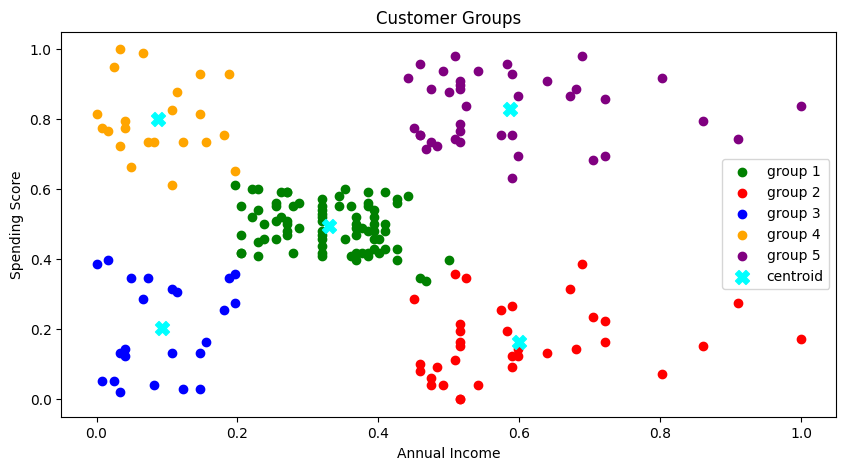

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.figure(figsize=(10,5))


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(df1['income'],df1['score'],color='green',label='group 1')
plt.scatter(df2['income'],df2['score'],color='red',label='group 2')
plt.scatter(df3['income'],df3['score'],color='blue',label='group 3')
plt.scatter(df4['income'],df4['score'],color='orange',label='group 4')
plt.scatter(df5['income'],df5['score'],color='purple',label='group 5')





# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='cyan',s=100, marker='X', label='centroid')
plt.legend()
plt.show()
